Importing necessary libraries.

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

dataset source: https://www.kaggle.com/imdevskp/corona-virus-report?select=worldometer_data.csv

In [58]:
df = pd.read_csv('covid19.csv')
df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,NaN,64365.0,NaN,978615.0,NaN,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
2,Russia,Europe,1.459353e+08,681251,6736.0,10161.0,134.0,450750.0,3871.0,220340.0,2300.0,4668.0,70.0,21069457.0,144375.0,Europe
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
4,Peru,South America,3.297490e+07,299080,NaN,10412.0,NaN,189621.0,NaN,99047.0,1210.0,9070.0,316.0,1761910.0,53432.0,Americas
5,Spain,Europe,4.675502e+07,297625,NaN,28385.0,NaN,NaN,NaN,NaN,617.0,6366.0,607.0,5448984.0,116543.0,Europe
6,Chile,South America,1.911774e+07,291847,NaN,6192.0,NaN,257445.0,NaN,28210.0,2077.0,15266.0,324.0,1163880.0,60880.0,Americas
7,UK,Europe,6.788994e+07,284900,NaN,44198.0,NaN,NaN,NaN,NaN,231.0,4196.0,651.0,10340511.0,152313.0,Europe
8,Mexico,North America,1.289441e+08,252165,6914.0,30366.0,523.0,152309.0,5104.0,69490.0,378.0,1956.0,235.0,634991.0,4925.0,Americas
9,Italy,Europe,6.046055e+07,241419,NaN,34854.0,NaN,191944.0,NaN,14621.0,71.0,3993.0,576.0,5600826.0,92636.0,Europe


Dataset Description.

This dataset is collected from kaggle. It's from worldometer website of coronavirus data table.

Features,

1. Country/Region: Name of the country/region
2. Continent: Name of the Contitnent of the country/region
3. Population: Population of that country
4. TotalCases: Total corona virus cases of that contry/region
5. NewCases: New corona virus cases of that contry/region
6. TotalDeaths: Total corona virus death cases of that contry/region
7. NewDeaths: New corona virus death cases of that contry/region
8. TotalRecovered: Total corona virus recovery cases of that contry/region
9. NewRecovered: New corona virus recovery cases of that contry/region
10. ActiveCases: Current total active corona virus cases of that country/region
11. Serious,Critical: Current total critical corona virus cases of that country/region
12. Tot Cases/1M pop: Total current corona virus cases per millon population of that country/region
13. Deaths/1M pop: Total current corona virus death cases per millon population of that country/region
14. TotalTests: Total current done corona virus tests of that country/region
15. Tests/1M pop: Total current done corona virus tests per million population of that country/region
16. WHO Region: The country under which WHO( World Heath Organization) region.

In [59]:
df.shape

(209, 16)

Total 209 countries data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         207 non-null    object 
 2   Population        207 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          56 non-null     float64
 5   TotalDeaths       183 non-null    float64
 6   NewDeaths         33 non-null     float64
 7   TotalRecovered    204 non-null    float64
 8   NewRecovered      50 non-null     float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  128 non-null    float64
 11  Tot Cases/1M pop  207 non-null    float64
 12  Deaths/1M pop     181 non-null    float64
 13  TotalTests        188 non-null    float64
 14  Tests/1M pop      188 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

We can see here some values are missing. Let's get a better visualization for null values.

In [61]:
df.isna().sum()

Country/Region        0
Continent             2
Population            2
TotalCases            0
NewCases            153
TotalDeaths          26
NewDeaths           176
TotalRecovered        5
NewRecovered        159
ActiveCases           4
Serious,Critical     81
Tot Cases/1M pop      2
Deaths/1M pop        28
TotalTests           21
Tests/1M pop         21
WHO Region           25
dtype: int64

A lot of missing values here. We have to fix those for better visualization.

In [62]:
df.describe(include='all')

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
count,209,207,2.070000e+02,2.090000e+02,56.000000,183.000000,33.000000,2.040000e+02,50.000000,2.050000e+02,128.000000,207.000000,181.000000,1.880000e+02,188.000000,184
unique,209,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Georgia,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
mean,NaN,NaN,3.052966e+07,5.420110e+04,703.517857,2893.754098,40.242424,3.027814e+04,543.840000,1.951984e+04,457.078125,2220.449275,80.476133,8.586751e+05,51568.941489,NaN
std,NaN,NaN,1.049037e+08,2.433294e+05,1408.303647,12213.646591,95.262148,1.234237e+05,1152.776194,1.165010e+05,1818.639860,4051.712878,163.255994,3.326283e+06,81573.931075,NaN
min,NaN,NaN,8.010000e+02,9.000000e+00,1.000000,1.000000,1.000000,8.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,0.080000,6.100000e+01,4.000000,NaN
25%,NaN,NaN,1.074178e+06,3.550000e+02,14.250000,15.000000,3.000000,2.285000e+02,18.500000,4.800000e+01,3.000000,176.500000,4.000000,1.283700e+04,5200.500000,NaN
50%,NaN,NaN,7.133192e+06,2.385000e+03,132.000000,74.000000,7.000000,1.379000e+03,105.000000,5.160000e+02,14.500000,694.000000,22.000000,8.526750e+04,21186.000000,NaN
75%,NaN,NaN,2.594054e+07,2.008500e+04,699.250000,607.000000,24.000000,1.133375e+04,380.500000,4.773000e+03,107.750000,2540.500000,59.000000,5.263038e+05,53282.750000,NaN


Decision:

Top affected continent: Africa

Total affected countries in Africa: 57

Most WHO region Continent: Europe

Total affected countries: 209

For better visualization let's convert the column names to a understandable format.

In [63]:
df.columns = ['Country','Continent','Population','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Critical','CasePerM','DeathPerM','TotalTests','TestPerM','WHOReg']
df.tail(10)

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
199,Dominica,North America,71988.0,18,NaN,NaN,NaN,18.0,NaN,0.0,NaN,250.0,NaN,623.0,8654.0,Americas
200,Fiji,Australia/Oceania,896510.0,18,NaN,NaN,NaN,18.0,NaN,0.0,NaN,20.0,NaN,4000.0,4462.0,WesternPacific
201,Saint Kitts and Nevis,North America,53203.0,16,NaN,NaN,NaN,15.0,NaN,1.0,NaN,301.0,NaN,483.0,9078.0,Americas
202,Falkland Islands,South America,3480.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3736.0,NaN,1197.0,343966.0,NaN
203,Greenland,North America,56771.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,229.0,NaN,3954.0,69648.0,Europe
204,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
205,Montserrat,North America,4992.0,11,NaN,1.0,NaN,10.0,NaN,0.0,NaN,2204.0,200.0,61.0,12220.0,NaN
206,Papua New Guinea,Australia/Oceania,8947704.0,11,NaN,NaN,NaN,8.0,NaN,3.0,NaN,1.0,NaN,7147.0,799.0,WesternPacific
207,Western Sahara,Africa,597354.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa
208,MS Zaandam,NaN,NaN,9,NaN,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.dtypes

Country            object
Continent          object
Population        float64
TotalCases          int64
NewCases          float64
TotalDeaths       float64
NewDeaths         float64
TotalRecovered    float64
NewRecovered      float64
ActiveCases       float64
Critical          float64
CasePerM          float64
DeathPerM         float64
TotalTests        float64
TestPerM          float64
WHOReg             object
dtype: object

Here we have found our data types of columns. So we are going to filter out the numerical columns.

In [65]:
cols = []
for col in df.columns:
    cols.append(col)
cols.remove('Country')
cols.remove('Continent')
cols.remove('WHOReg')
cols

['Population',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Critical',
 'CasePerM',
 'DeathPerM',
 'TotalTests',
 'TestPerM']

Categorized the numerical columns by their continent to fill the null values of those columns by their median of their continent.

In [66]:
for col in cols:
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(df.groupby('Continent')[col].transform('median'))

df.isna().sum()

Country            0
Continent          2
Population         2
TotalCases         0
NewCases           2
TotalDeaths        0
NewDeaths          8
TotalRecovered     1
NewRecovered       2
ActiveCases        0
Critical           1
CasePerM           2
DeathPerM          2
TotalTests         2
TestPerM           2
WHOReg            25
dtype: int64

Still we have some null values as the some of the contitnents such as Australia hasn't updated the data of that day. So it couldn't find the data to measure the mean of that continent.

In [67]:
print(df[df["Continent"].isnull()]['Country'])

144    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


These are not under any Continent. Found out these are ships. No idea why these two are included.

In [68]:
print(df[df["Population"].isnull()]['Country'])

144    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


In [69]:
print(df[df["NewCases"].isnull()]['Country'])

144    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


In [70]:
print(df[df["NewDeaths"].isnull()]['Country'])

70            Australia
120         New Zealand
144    Diamond Princess
186    French Polynesia
197       New Caledonia
200                Fiji
206    Papua New Guinea
208          MS Zaandam
Name: Country, dtype: object


As the Australia continent hasn't updated the values of that day so there's no median of that contitnent

In [71]:
print(df[df["TotalRecovered"].isnull()]['Country'])

208    MS Zaandam
Name: Country, dtype: object


In [72]:
print(df[df["NewRecovered"].isnull()]['Country'])

144    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


In [73]:
print(df[df["Critical"].isnull()]['Country'])

208    MS Zaandam
Name: Country, dtype: object


In [74]:
print(df[df["WHOReg"].isnull()]['Country'])

86              French Guiana
93                        CAR
101                   Mayotte
144          Diamond Princess
149           Channel Islands
151                   Réunion
159               Isle of Man
164                Martinique
167            Cayman Islands
169            Faeroe Islands
170                Guadeloupe
171                 Gibraltar
173                   Brunei 
177                     Aruba
182              Sint Maarten
186          French Polynesia
188          Turks and Caicos
189                     Macao
190              Saint Martin
192    St. Vincent Grenadines
194                   Curaçao
197             New Caledonia
202          Falkland Islands
205                Montserrat
208                MS Zaandam
Name: Country, dtype: object


So these are the regions that are not classified under any WHO region.

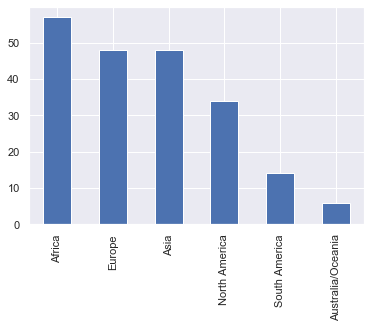

In [75]:
plot = df["Continent"].value_counts().plot(kind="bar")

Africa has the most countries infected with this virus.

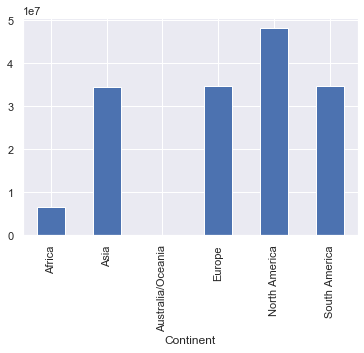

In [76]:
TCC = df.melt(['TotalCases','Continent']).groupby('Continent').TotalCases.sum().dropna().plot(kind='bar')

But from here we can see that although countries of Africa are most infected but most cases are in North America. And Australia is in the safest pposition.

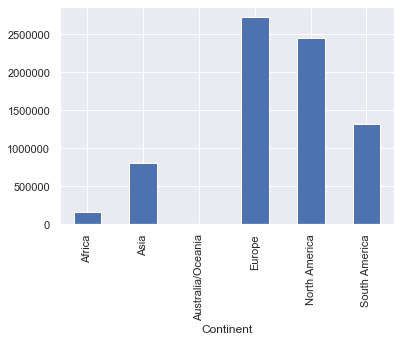

In [77]:
TD = df.melt(['TotalDeaths','Continent']).groupby('Continent').TotalDeaths.sum().dropna().plot(kind='bar')

Maximum deaths are in the North America Continent and minimum in the Africa. From here I have an assumption that people of poorer countries have better immune system, or there isn't enough good reporting, must have missed actual death reports

In [78]:
idx = df.groupby(['Continent'])['TotalDeaths'].transform(max) == df['TotalDeaths']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
7,UK,Europe,6.788994e+07,284900,57.0,44198.0,3.5,2854.5,99.5,660.5,231.0,4196.0,651.0,10340511.0,152313.0,Europe
22,Egypt,Africa,1.023422e+08,74035,116.0,3280.0,4.0,20103.0,49.0,50652.0,41.0,723.0,32.0,135000.0,1319.0,EasternMediterranean
70,Australia,Australia/Oceania,2.550220e+07,8449,87.0,104.0,NaN,7399.0,44.0,946.0,4.0,331.0,4.0,2711849.0,106338.0,WesternPacific


USA is highest with the number of deaths in North America continent as well as among all the countries in the world. India has the first position in Asia.

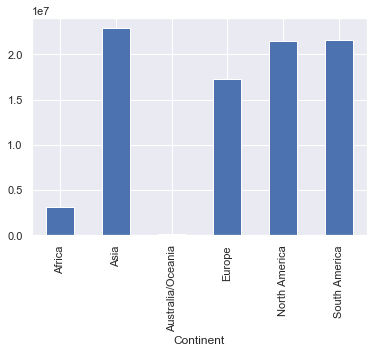

In [79]:
TR = df.melt(['TotalRecovered','Continent']).groupby('Continent').TotalRecovered.sum().dropna().plot(kind='bar')

In terms of total recovery Asia is in the top position! It seems like people of Asia continent has better immune system than others as they don't have good health department like European or American countries. 

In [80]:
idx = df.groupby(['Continent'])['TotalDeaths'].transform(max) == df['TotalDeaths']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
7,UK,Europe,6.788994e+07,284900,57.0,44198.0,3.5,2854.5,99.5,660.5,231.0,4196.0,651.0,10340511.0,152313.0,Europe
22,Egypt,Africa,1.023422e+08,74035,116.0,3280.0,4.0,20103.0,49.0,50652.0,41.0,723.0,32.0,135000.0,1319.0,EasternMediterranean
70,Australia,Australia/Oceania,2.550220e+07,8449,87.0,104.0,NaN,7399.0,44.0,946.0,4.0,331.0,4.0,2711849.0,106338.0,WesternPacific


USA has the highest number of recovery in North America as well as around the world. India has got the top position in terms of recovery in Asia. They are also top in terms of death and total cases of their own continent.

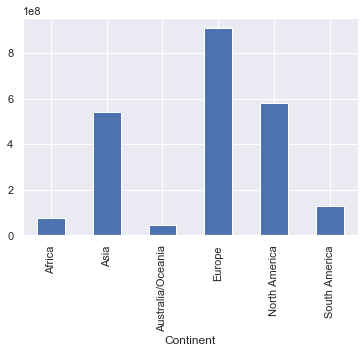

In [81]:
TT = df.melt(['TotalTests','Continent']).groupby('Continent').TotalTests.sum().dropna().plot(kind='bar')

In terms of tests Europe is in the top position. Australia is the lowest but that's okay because they are also less indected. But The number of tests in Africa and South America shows that the economic situation is not in control their. Also they are not getting enough help. Africa has the 2nd most number infected countries and South America has a good portion of deaths and infection number. But according to that their number of tests are very less.

In [82]:
idx = df.groupby(['Continent'])['TotalTests'].transform(max) == df['TotalTests']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
2,Russia,Europe,1.459353e+08,681251,6736.0,10161.0,134.0,450750.0,3871.0,220340.0,2300.0,4668.0,70.0,21069457.0,144375.0,Europe
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
15,South Africa,Africa,5.931415e+07,187977,116.0,3026.0,4.0,91227.0,49.0,93724.0,539.0,3169.0,51.0,1792078.0,30213.0,Africa
70,Australia,Australia/Oceania,2.550220e+07,8449,87.0,104.0,NaN,7399.0,44.0,946.0,4.0,331.0,4.0,2711849.0,106338.0,WesternPacific


India has got the highest number of tests among all countries. Although Brazil has a lot of infected cases and deaths but their number of tests are very less. It shows that Brazil is now in a very critical position.

In [83]:
idx = df.groupby(['Continent'])['TestPerM'].transform(min) == df['TestPerM']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
67,Sudan,Africa,43850981.0,9767,104.0,608.0,4.0,4673.0,49.0,4486.0,6.5,223.0,14.0,401.0,9.0,EasternMediterranean
79,Haiti,North America,11403573.0,6294,64.0,113.0,3.0,1408.0,122.0,4773.0,7.5,552.0,10.0,12847.0,1127.0,Americas
100,Albania,Europe,2877753.0,2893,74.0,76.0,2.0,1657.0,20.0,1160.0,8.0,1005.0,26.0,24601.0,8549.0,Europe
123,Yemen,Asia,29827531.0,1248,283.0,337.0,10.0,537.0,88.0,374.0,24.5,42.0,11.0,120.0,4.0,EasternMediterranean
150,Suriname,South America,586680.0,565,1253.0,14.0,58.0,276.0,506.0,275.0,6.0,963.0,24.0,1244.0,2120.0,Americas
206,Papua New Guinea,Australia/Oceania,8947704.0,11,45.0,63.0,NaN,8.0,44.0,3.0,2.5,1.0,4.0,7147.0,799.0,WesternPacific


Here we can see that the situation in sudan is very unwell. Per million they have done only 9 tests! that's not a good sign. It shows why Africa is in danger postion. The almighty Allah helping them now only. In Asia Yemen is has the lowest number of tests per million.They are the lowest in this list. Only 4/million tests done here. This country wasn't in a good position and the situation there got worsen.

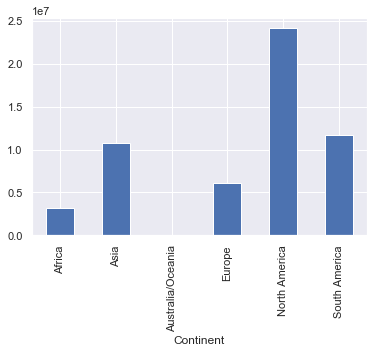

In [84]:
TAC = df.melt(['ActiveCases','Continent']).groupby('Continent').ActiveCases.sum().dropna().plot(kind='bar')

So North America and South America are now the red zone for this pandemic. Asia is rising gradually and gonna be the next hit.

In [85]:
idx = df.groupby(['Continent'])['ActiveCases'].transform(max) == df['ActiveCases']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
2,Russia,Europe,1.459353e+08,681251,6736.0,10161.0,134.0,450750.0,3871.0,220340.0,2300.0,4668.0,70.0,21069457.0,144375.0,Europe
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
15,South Africa,Africa,5.931415e+07,187977,116.0,3026.0,4.0,91227.0,49.0,93724.0,539.0,3169.0,51.0,1792078.0,30213.0,Africa
70,Australia,Australia/Oceania,2.550220e+07,8449,87.0,104.0,NaN,7399.0,44.0,946.0,4.0,331.0,4.0,2711849.0,106338.0,WesternPacific


So from this we can say that USA,Brazil has got the worse position in this list. 

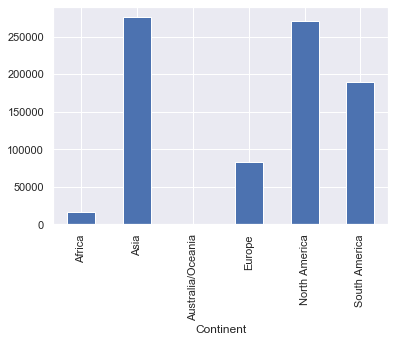

In [86]:
TCR = df.melt(['Critical','Continent']).groupby('Continent').Critical.sum().dropna().plot(kind='bar')

So we can have another confirmation that Asia is gonna be the next hit as it has the highest number of critical cases among all the continents. North America and South America's result is as expected.

In [87]:
idx = df.groupby(['Continent'])['Critical'].transform(max) == df['Critical']
df[idx]

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,3.310234e+08,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,2.125747e+08,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas
2,Russia,Europe,1.459353e+08,681251,6736.0,10161.0,134.0,450750.0,3871.0,220340.0,2300.0,4668.0,70.0,21069457.0,144375.0,Europe
3,India,Asia,1.380123e+09,675453,1549.0,19303.0,24.0,409083.0,21.0,247067.0,8944.0,489.0,14.0,9789066.0,7093.0,South-EastAsia
15,South Africa,Africa,5.931415e+07,187977,116.0,3026.0,4.0,91227.0,49.0,93724.0,539.0,3169.0,51.0,1792078.0,30213.0,Africa
70,Australia,Australia/Oceania,2.550220e+07,8449,87.0,104.0,NaN,7399.0,44.0,946.0,4.0,331.0,4.0,2711849.0,106338.0,WesternPacific


So the situation in USA and Brazil are as expected. India and Russia are coming up gradually. Australia is in the most safe position. So we can say North America, South America is now hot zone of covid 19 and Asia is going to be the next hot zone. Europe has just fighting back well.

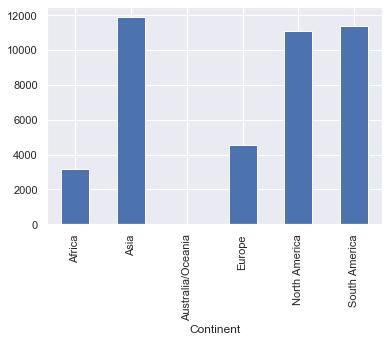

In [88]:
TND = df.melt(['NewDeaths','Continent']).groupby('Continent').NewDeaths.sum().dropna().plot(kind='bar')

This is another confirmation that Asia is gonna be the next hit, as already it's having the most number of new deaths. Europe is coming back strongly from their weak position. North America and South America as expected. But South American countries are helpless now. As most of them are not that rich enough and they are now dependent on their fate.

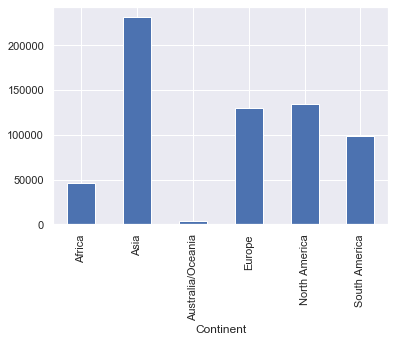

In [89]:
TNR = df.melt(['NewRecovered','Continent']).groupby('Continent').NewRecovered.sum().dropna().plot(kind='bar')

This shows that people of Asia has a much better immune system. Also there's another reason for this may happen. Europe and NA,SA were affected througout the continent in a large scale. So then they didn't had enough knowledge of preventing this pandemic. As a result from them later other countries has learnt a lot to fight against this virus. So they have a better recovery rate. in this case it is Asia continent.

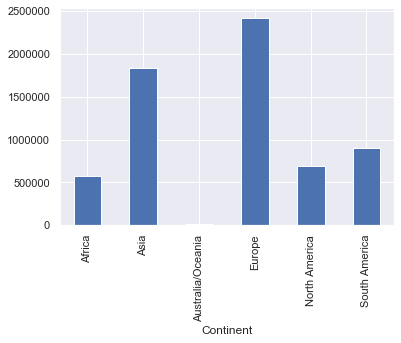

In [90]:
TNR = df.melt(['CasePerM','Continent']).groupby('Continent').CasePerM.sum().dropna().plot(kind='bar')

Although the death and cases are larger in North America and South America but Cases:Population is much better in those continent. Europe was affected most with having less population. Asia is coming up to break the record of Europe.

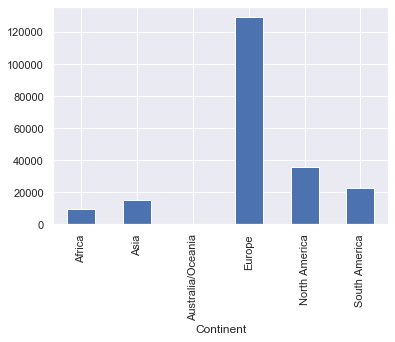

In [91]:
TNR = df.melt(['DeathPerM','Continent']).groupby('Continent').DeathPerM.sum().dropna().plot(kind='bar')

In terms of deaths:population Asia is in a safer position than others although they are going to be a hot zone. Europe has the worst situation in that case. NA and SA also have a less ratio of death against population. So we can say that Europe has the worst situation though they had well health department and other first world benefits.

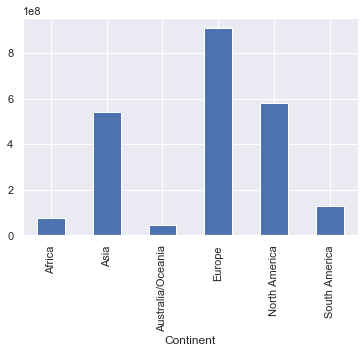

In [92]:
TNR = df.melt(['TotalTests','Continent']).groupby('Continent').TotalTests.sum().dropna().plot(kind='bar')

As Europe was affected the most so they had the most tests. And as population of Europe is less surely we can say that they had done most tests against their per million population.

In [93]:
df.head(2)

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM,WHOReg
0,USA,North America,331023450.0,2936175,405.0,132327.0,9.0,1260619.0,214.0,1543229.0,16017.0,8870.0,400.0,36955038.0,111639.0,Americas
1,Brazil,South America,212574666.0,1578376,1253.0,64365.0,58.0,978615.0,506.0,535396.0,8318.0,7425.0,303.0,3330562.0,15668.0,Americas


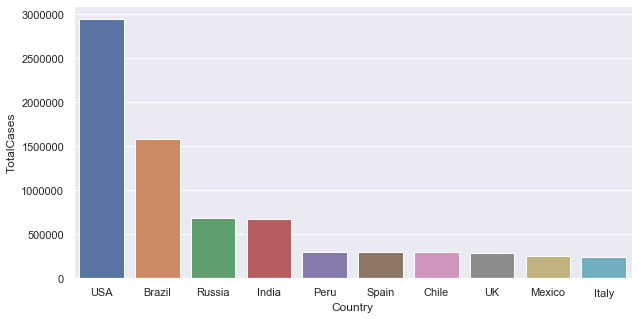

In [94]:
df1 = df.sort_values('TotalCases',ascending = False).head(10)
plt.figure(figsize=(10,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["TotalCases"])

So these are the top 10 countries where the virus has spread the most. USA is the top country and their situation is worse than others. 2nd top country Brazil has about half of USA's total cases. There's only one asian country India that shows in Asia the virus is spread well but situation is still under control. If we look closely we can see that the situation in North America and South America has worsen mostly for USA and Brazil. So the virus in those continents hasn't spread like Asia. Only these two countries are most responsible for over all record in this table.

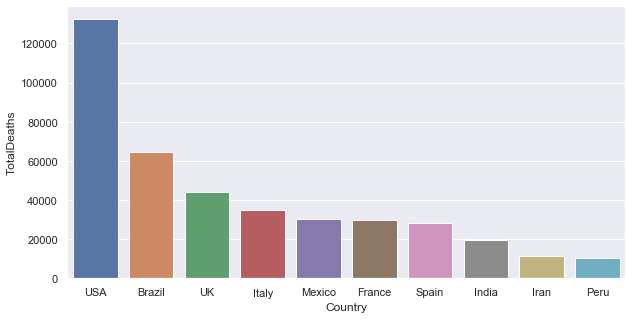

In [95]:
df1 = df.sort_values('TotalDeaths',ascending = False).head(10)
plt.figure(figsize=(10,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["TotalDeaths"])

So as expected result but the point is although UK, Italy,Mexico, France, Spain had less affected population but in terms of death they are well ahead of the other countries like India, Peru, Russia. So we can say that these countries just passed an unbearable time in their history.

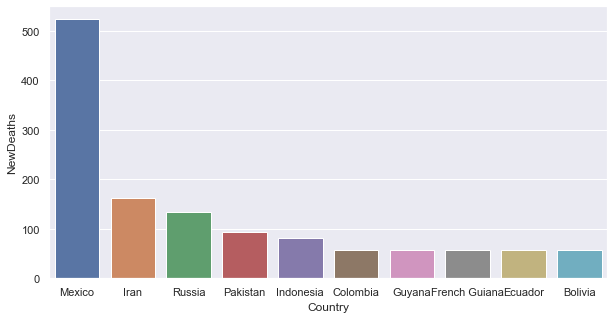

In [96]:
df1 = df.sort_values('NewDeaths',ascending = False).head(10)
plt.figure(figsize=(10,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["NewDeaths"])

Seems like values are missing here as at the time of the collection of data many countrys hasn't updated their data for NewDeaths. 

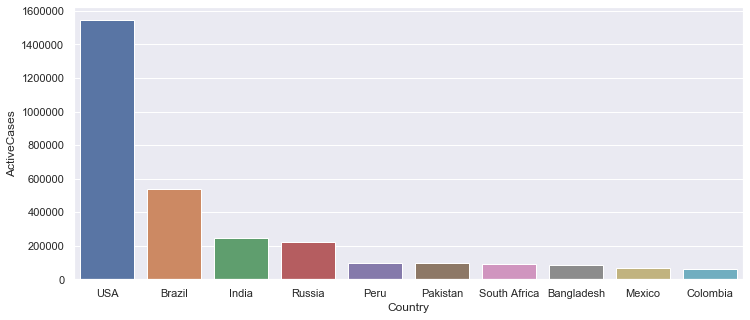

In [97]:
df1 = df.sort_values('ActiveCases',ascending = False).head(10)
plt.figure(figsize=(12,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["ActiveCases"])

So from here we can say that USA,Brazil,India,Russia are current red zone. The rest are going to that way. Although Bangladesh is a small country but their situation is getting worse. And as we can see 3 out of top 10 countries are from Asia. It's pointing that Asia is the next hit zone.

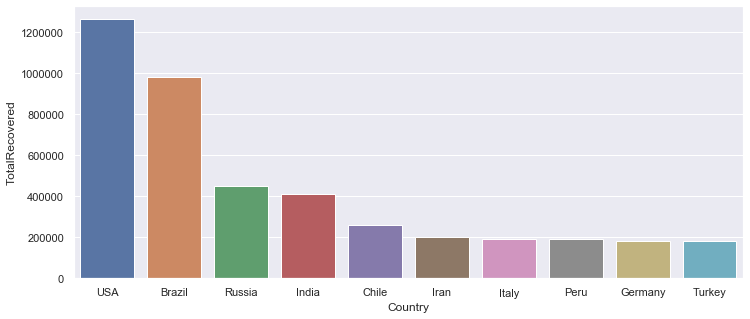

In [98]:
df1 = df.sort_values('TotalRecovered',ascending = False).head(10)
plt.figure(figsize=(12,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["TotalRecovered"])

The countries which affected the most have recovered the most, although there's no record of UK. Germany has done a great job in my eyes.

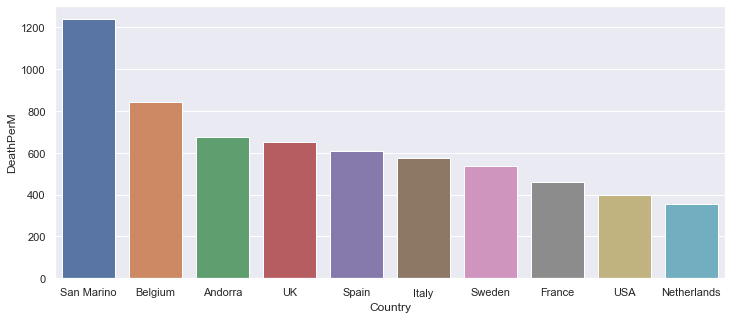

In [99]:
df1 = df.sort_values('DeathPerM',ascending = False).head(10)
plt.figure(figsize=(12,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["DeathPerM"])

Except San Marino and Andorra all are countries here has a large population. And in terms of death per million their situation is really poor.

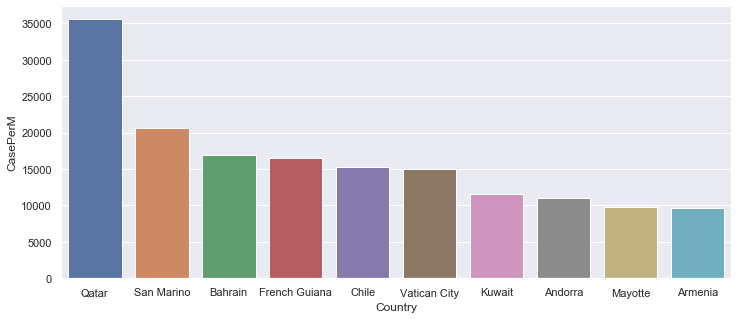

In [100]:
df1 = df.sort_values('CasePerM',ascending = False).head(10)
plt.figure(figsize=(12,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["CasePerM"])

So this shows that although these countries has less population than the countries that affected and had death the most, these countries couldn't save themselves affecting from it. It shows whether these countries were unaware or the virus is too strong to be fold up.

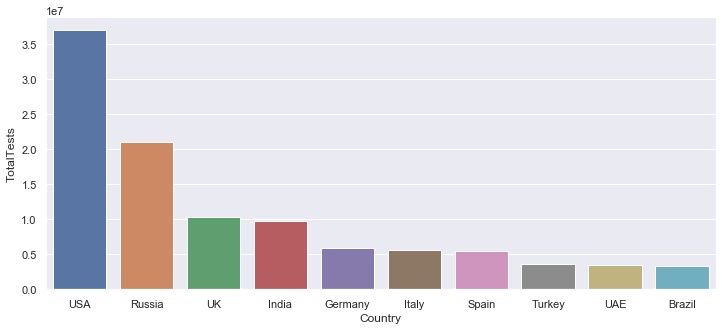

In [101]:
df1 = df.sort_values('TotalTests',ascending = False).head(10)
plt.figure(figsize=(12,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["TotalTests"])

These are the top countries which are rich and could afford a high number of tests. You can see brazil at the last position, though it has a huge number of cases and deaths. This shows the economical situation of this country.

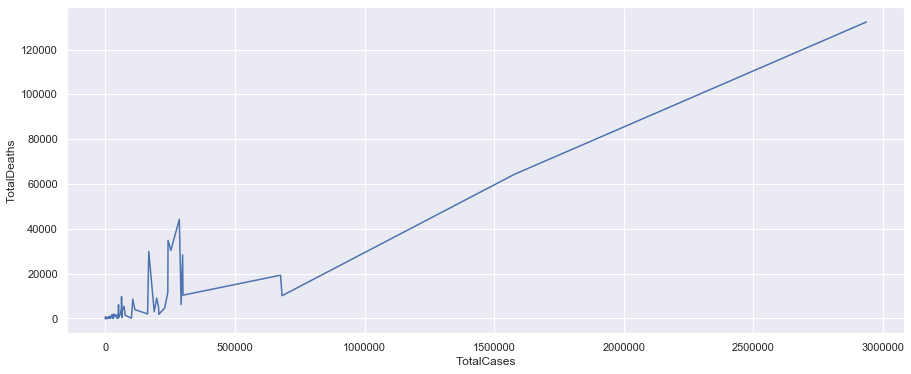

In [107]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=df["TotalCases"],
                    y=df["TotalDeaths"])

So we can say that the number of deaths increases the with the number of cases. And if the number of cases are more than around 70 thousands the number of death increases in a constant number. 

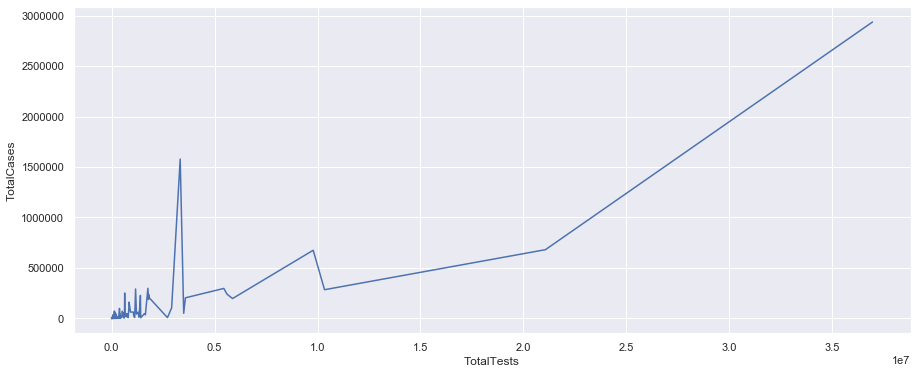

In [108]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=df["TotalTests"],
                    y=df["TotalCases"])

So this shows the number of cases depends on number of tests. So it's another hypothesis that poorer countries are missing case and death numbers.

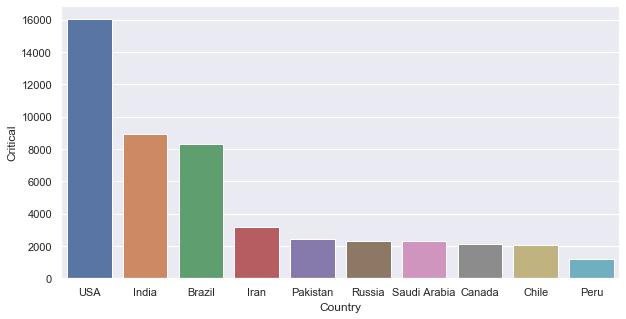

In [109]:
df1 = df.sort_values('Critical',ascending = False).head(10)
plt.figure(figsize=(10,5))
plot = sns.barplot(x=df1["Country"], 
                   y=df1["Critical"])

So these countries have the most critical cases right now, and again it's a proof that Asian countries are coming up to the list and gonna be a red zone soon.

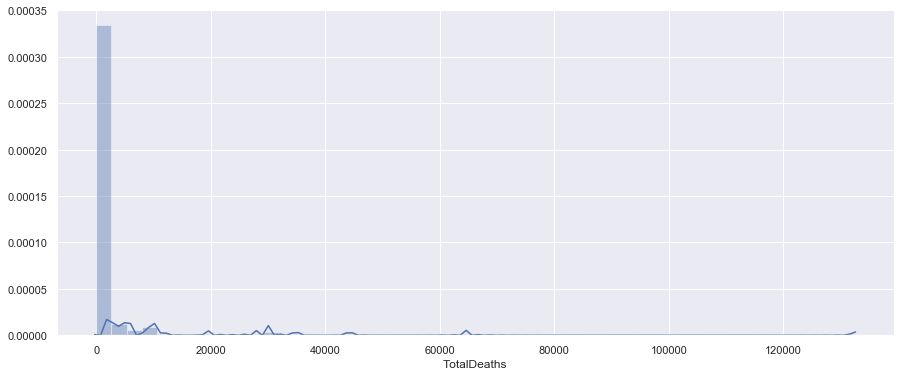

In [126]:
plt.figure(figsize=(15,6))
plot = sns.distplot(df["TotalDeaths"],
                    hist=True)

It shows that most of the countries are still in very good position in terms of deaths. And as a few countries has poor situation so it's showing some outliers.

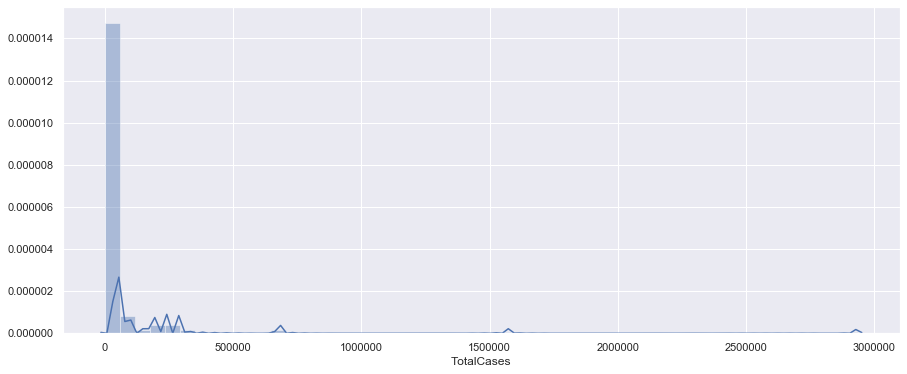

In [125]:
plt.figure(figsize=(15,6))
plot = sns.distplot(df["TotalCases"],
                    hist=True)

It shows that most of the countries are still in very good position in terms of totalcases. And as a few countries has poor situation so it's showing some outliers.

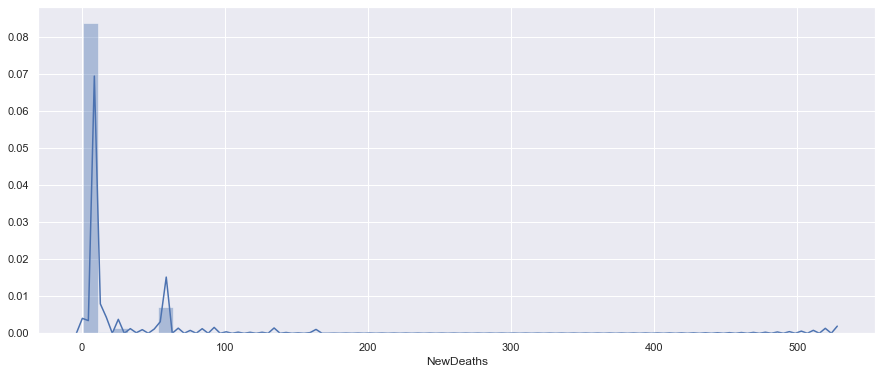

In [124]:
plt.figure(figsize=(15,6))
plot = sns.distplot(df["NewDeaths"],
                    hist=True)

It shows that most of the countries are still in very good position in terms of totalcases. And we can see some outliers  here too as a some countries has poor situation.

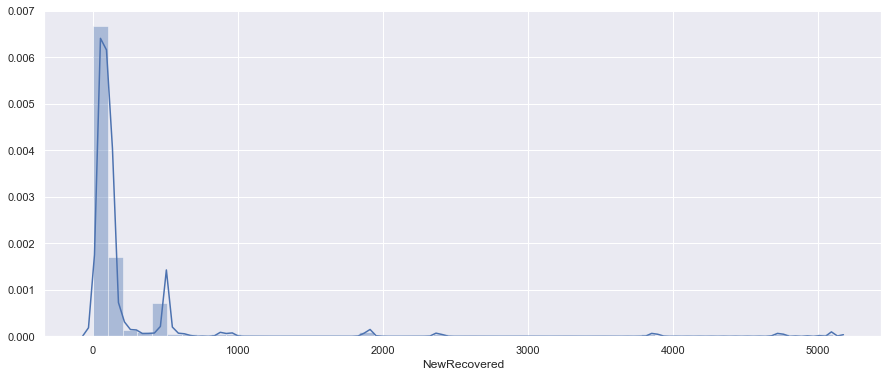

In [123]:
plt.figure(figsize=(15,6))
plot = sns.distplot(df["NewRecovered"],
                    hist=True)

Very less outliers here. As the new recovered number is connected to the new cases.

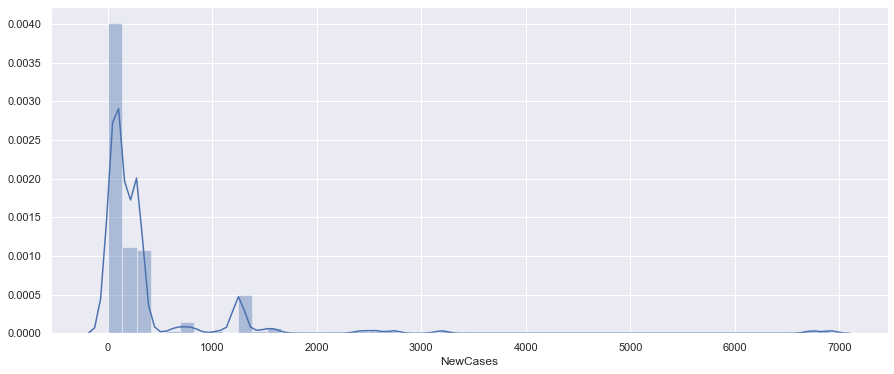

In [122]:
plt.figure(figsize=(15,6))
plot = sns.distplot(df["NewCases"],
                    hist=True)

As most of the countries has less new cases so the number of new recovered cases are less. A line plot will make it clearer. And there are some outliers.

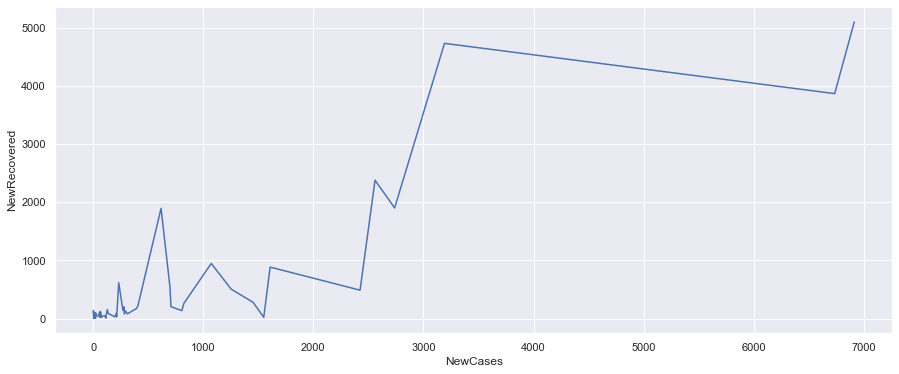

In [120]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=df["NewCases"],
                    y=df["NewRecovered"])

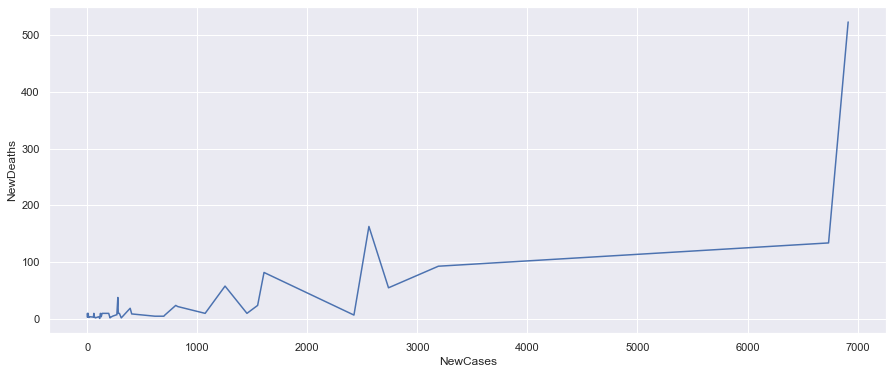

In [121]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=df["NewCases"],
                    y=df["NewDeaths"])

The increasing number of new cases are also related to increasing number of new deaths. Also there's some values are missing but still we can say more the cases, the more the deaths.

In [131]:
df.corr()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,CasePerM,DeathPerM,TotalTests,TestPerM
Population,1.000000,0.440518,0.283706,0.357966,0.158185,0.471684,0.176317,0.390019,0.622707,-0.030902,0.020694,0.423475,-0.081474
TotalCases,0.440518,1.000000,0.250570,0.932088,0.162918,0.970272,0.198547,0.969501,0.943722,0.208854,0.265264,0.863072,0.057359
NewCases,0.283706,0.250570,1.000000,0.189182,0.839085,0.320181,0.887652,0.181148,0.219008,0.088552,0.025695,0.294760,-0.025727
TotalDeaths,0.357966,0.932088,0.189182,1.000000,0.206173,0.866361,0.165523,0.887964,0.838523,0.178386,0.410831,0.817597,0.069127
NewDeaths,0.158185,0.162918,0.839085,0.206173,1.000000,0.214659,0.798004,0.103187,0.130645,0.042489,0.069367,0.107115,-0.045115
TotalRecovered,0.471684,0.970272,0.320181,0.866361,0.214659,1.000000,0.258811,0.908063,0.932545,0.235124,0.229992,0.799660,0.050747
NewRecovered,0.176317,0.198547,0.887652,0.165523,0.798004,0.258811,1.000000,0.133788,0.162969,0.169684,0.050453,0.219287,-0.001798
ActiveCases,0.390019,0.969501,0.181148,0.887964,0.103187,0.908063,0.133788,1.000000,0.919050,0.154460,0.188471,0.847212,0.037977
Critical,0.622707,0.943722,0.219008,0.838523,0.130645,0.932545,0.162969,0.919050,1.000000,0.164852,0.188743,0.792999,0.022833
CasePerM,-0.030902,0.208854,0.088552,0.178386,0.042489,0.235124,0.169684,0.154460,0.164852,1.000000,0.475260,0.155071,0.385565


This correlation matrix is going to make everything more clearer.

1. Population has a good relation with Total Cases, Total Deaths, Total Recovered and Total Critical cases, Total tests. So these 5 are well dependent on the population of a country. 

2. Total cases has a strong connection with Total deaths. So more the infected cases more the deaths. This is a message to the countries that are not vastly affected yet. Good thing is that Total cases are strongly connected with Total Recovered cases. And another bad thing is that more the infected cases, more the critical cases. And number of total cases increases with number of total tests.

3. New cases has a strong connection with New deaths and new recovered. 

4. Total Recovered has a strong connection with total deaths. That means number of total recovered cases increases with number of total deaths. Also it's strongly connected with TotalCases (most), Active cases, Total tests and Critical cases.

5. New recovered cases has a good connection with new deaths. 

6. Total deaths has a strong connection with total tests. So more the number of tests, more the infected, more the deaths.

7. Active cases has strong connections with Total cases, Total recovered, Total Deaths, Critical, Total deaths. 

8. Cases Per million has a negative co relation with population, means that more the population less the cases. 

9. Tests Per million also has a negative correlation with population as well as New cases and new deaths. So less tests more deaths. It's happening in the poorer countries. 